In [1]:
import pandas as pd
import missingno as msno

/tmp/ipykernel_48506/1410689855.py:3: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv("../data/sni_2000-2023.csv")


<Axes: >

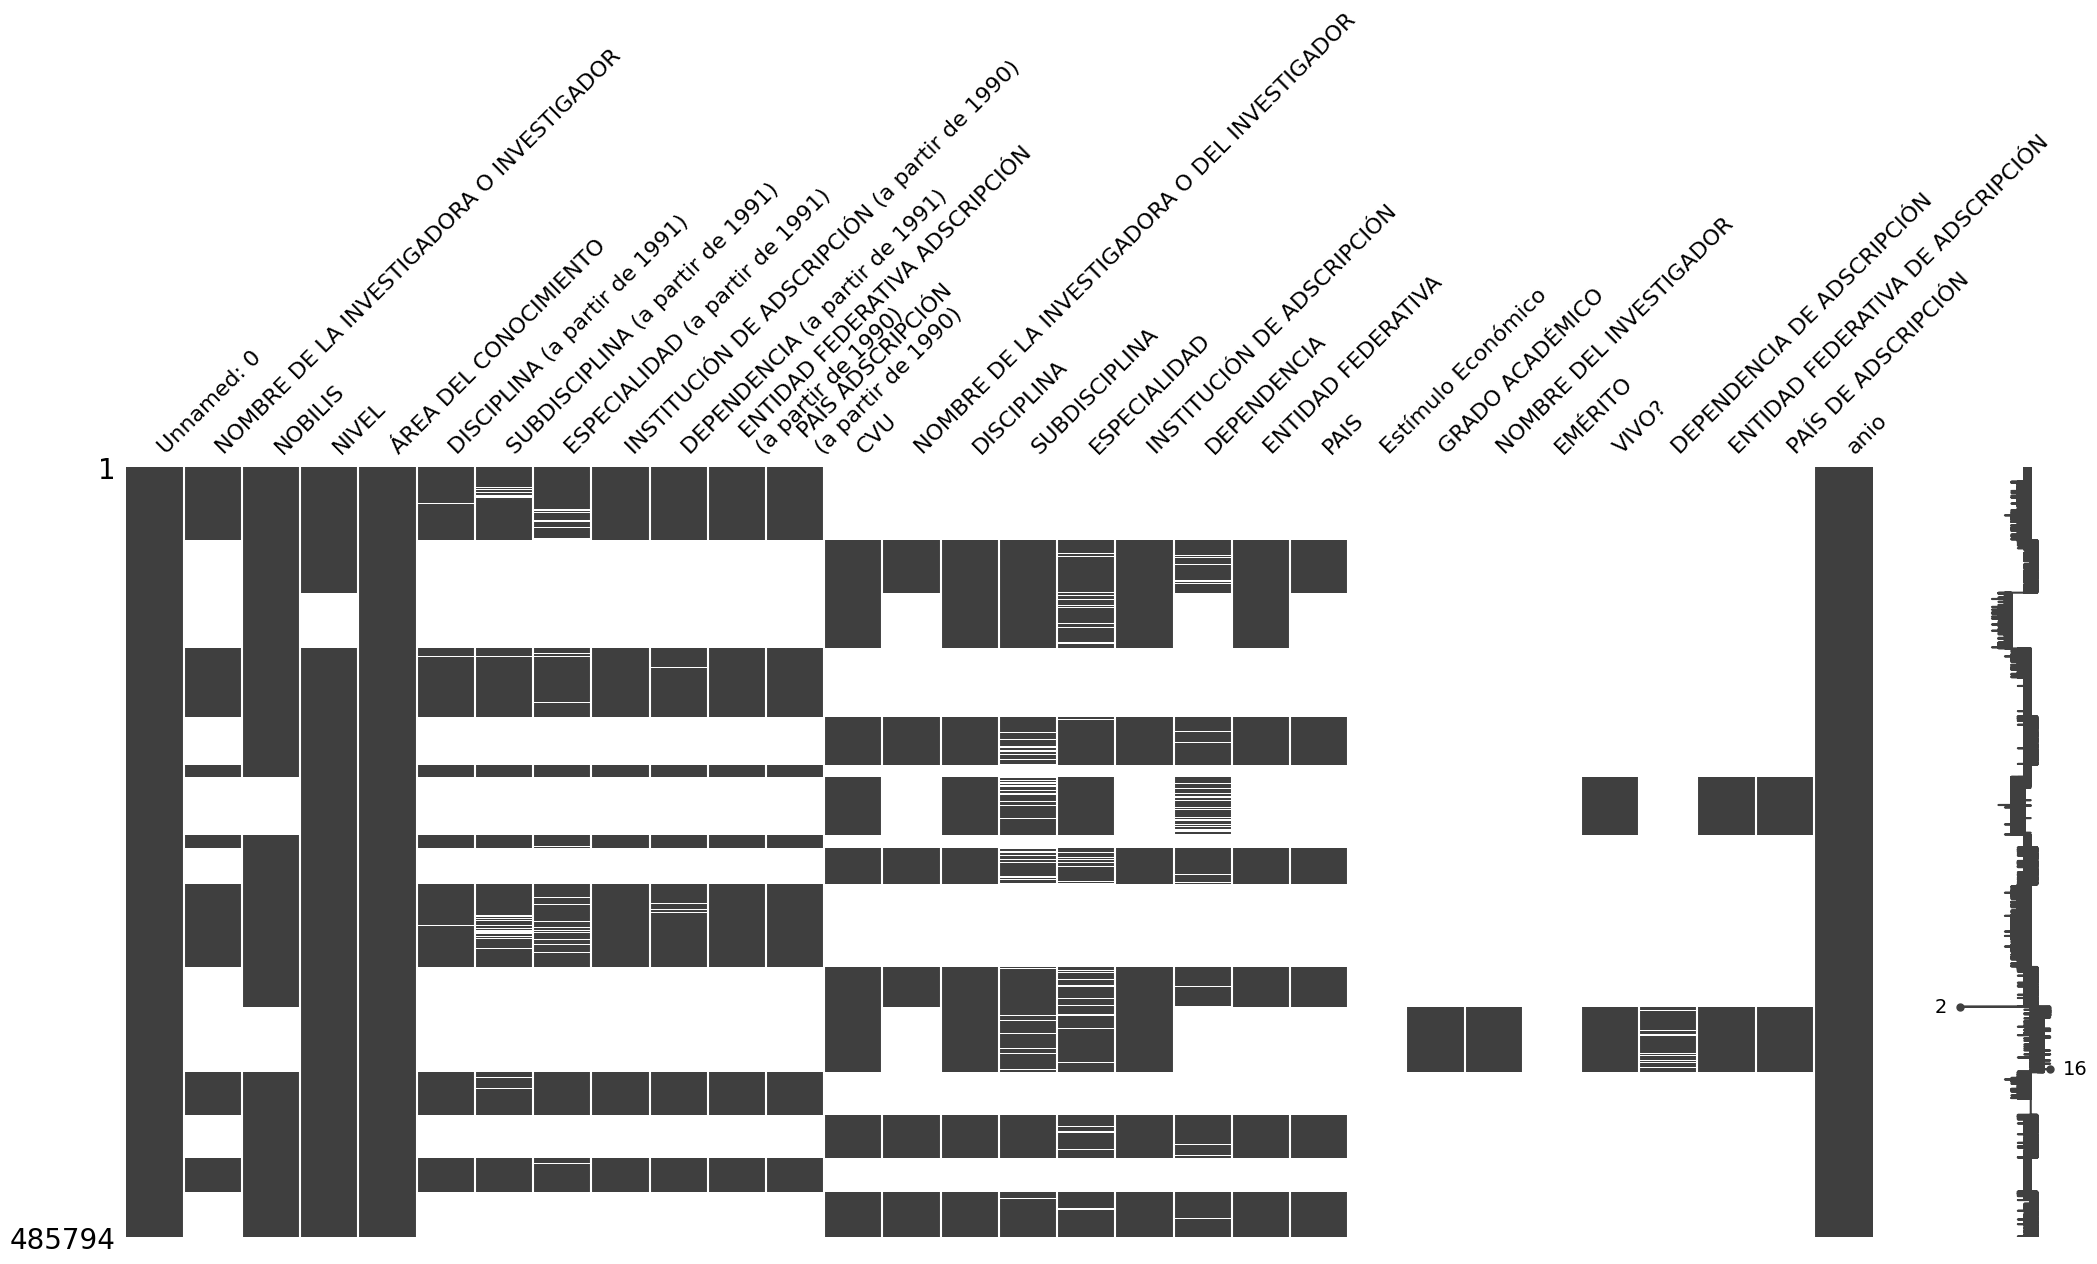

In [2]:
#f = "../data/sni_2000-2023.zip"
#tmp = pd.read_csv(f,index_col=0),compression="zip")
tmp = pd.read_csv("../data/sni_2000-2023.csv")
sni = pd.DataFrame()
sni["grado"] = tmp["NOBILIS"].fillna(tmp["GRADO ACADÉMICO"])
sni["disciplina"] = tmp["DISCIPLINA (a partir de 1991)"].fillna(tmp["DISCIPLINA"])
sni["adscripcion"] = tmp["INSTITUCIÓN DE ADSCRIPCIÓN (a partir de 1990)"].fillna(tmp["INSTITUCIÓN DE ADSCRIPCIÓN"])
sni["entidad"] = tmp[["ENTIDAD FEDERATIVA ADSCRIPCIÓN\n(a partir de 1990)", 
                            "ENTIDAD FEDERATIVA DE ADSCRIPCIÓN", 
                            "ENTIDAD FEDERATIVA"]].bfill(axis=1).iloc[:, 0]
sni["dependencia"] = tmp[["DEPENDENCIA (a partir de 1991)", 
                            "DEPENDENCIA", 
                            "DEPENDENCIA DE ADSCRIPCIÓN"]].bfill(axis=1).iloc[:, 0]

sni["area"] = tmp["ÁREA DEL CONOCIMIENTO"]
sni["nivel"] = tmp.NIVEL
sni["anio"] = tmp.anio
msno.matrix(tmp)

In [3]:
tmp.columns

Index(['Unnamed: 0', 'NOMBRE DE LA INVESTIGADORA O INVESTIGADOR', 'NOBILIS',
       'NIVEL', 'ÁREA DEL CONOCIMIENTO', 'DISCIPLINA (a partir de 1991)',
       'SUBDISCIPLINA (a partir de 1991)', 'ESPECIALIDAD (a partir de 1991)',
       'INSTITUCIÓN DE ADSCRIPCIÓN (a partir de 1990)',
       'DEPENDENCIA (a partir de 1991)',
       'ENTIDAD FEDERATIVA ADSCRIPCIÓN\n(a partir de 1990)',
       'PAIS ADSCRIPCIÓN \n(a partir de 1990)', 'CVU',
       'NOMBRE DE LA INVESTIGADORA O DEL INVESTIGADOR', 'DISCIPLINA',
       'SUBDISCIPLINA', 'ESPECIALIDAD', 'INSTITUCIÓN DE ADSCRIPCIÓN',
       'DEPENDENCIA', 'ENTIDAD FEDERATIVA', 'PAIS', 'Estímulo Económico',
       'GRADO ACADÉMICO', 'NOMBRE DEL INVESTIGADOR', 'EMÉRITO', 'VIVO?',
       'DEPENDENCIA DE ADSCRIPCIÓN', 'ENTIDAD FEDERATIVA DE ADSCRIPCIÓN',
       'PAÍS DE ADSCRIPCIÓN', 'anio'],
      dtype='object')

<Axes: >

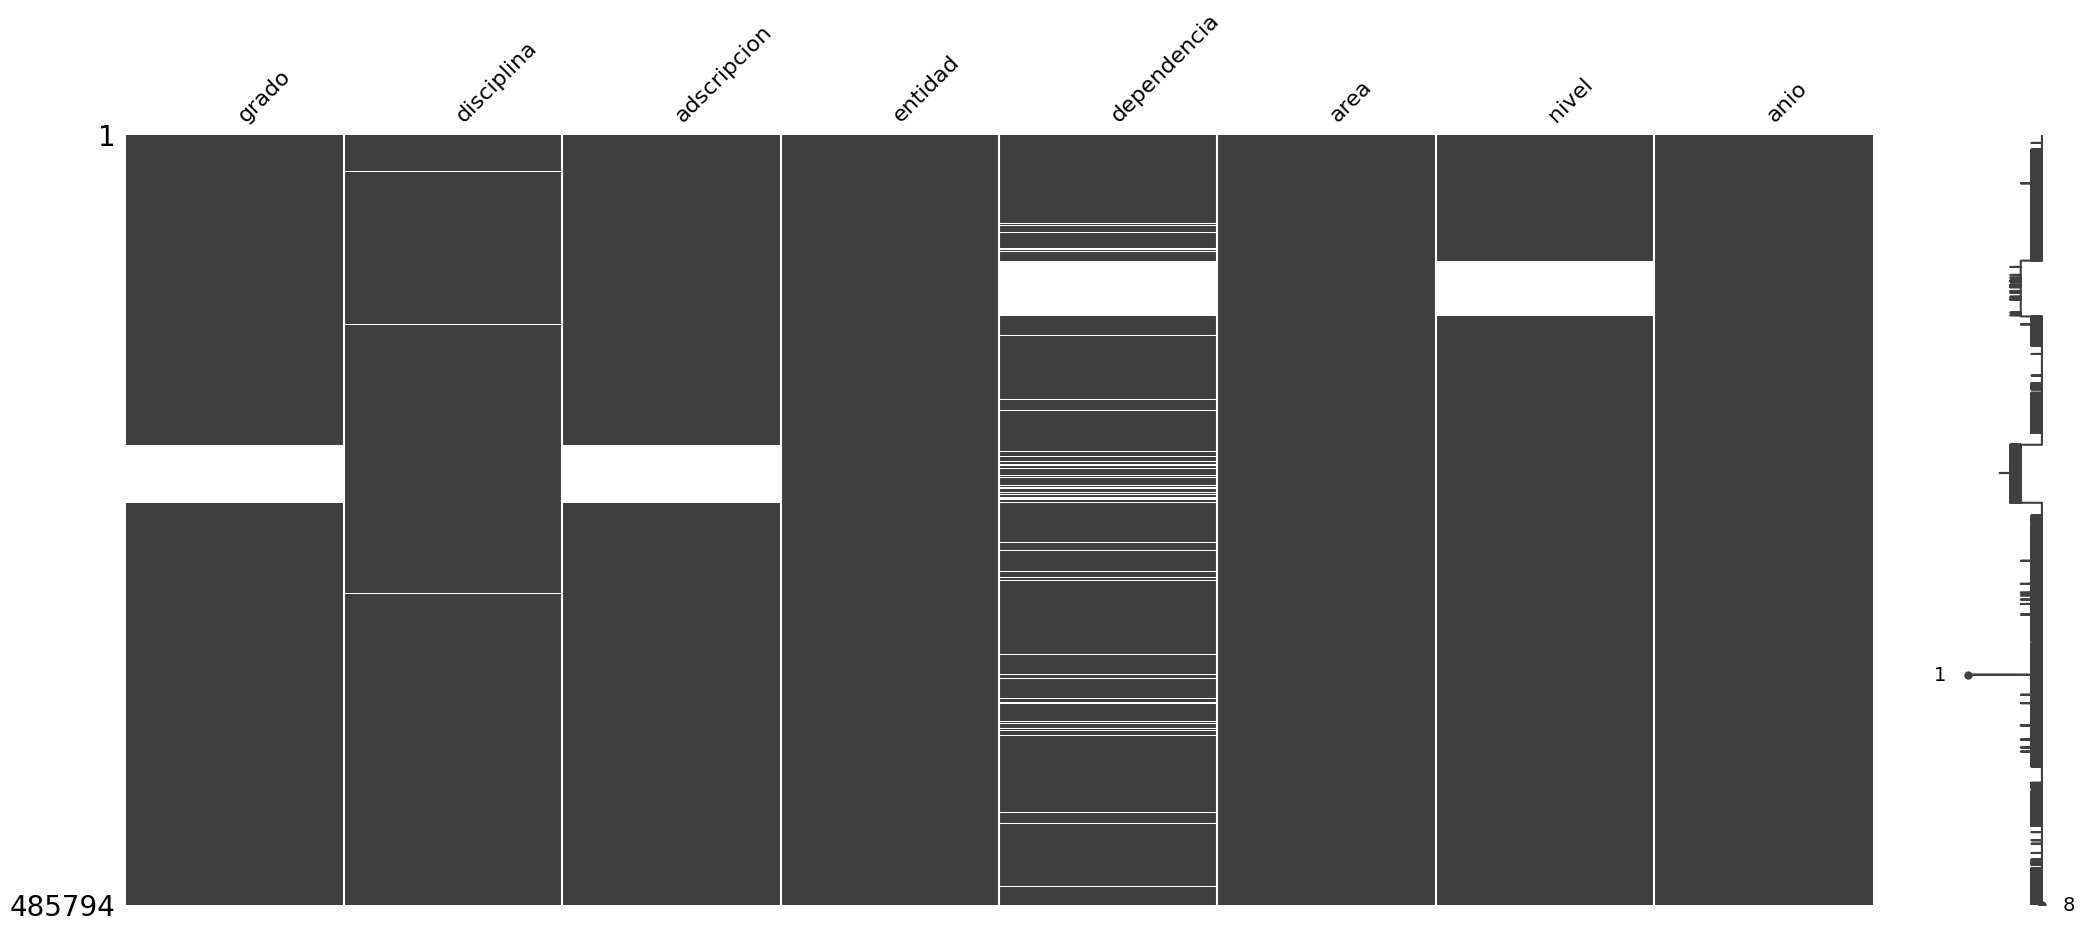

In [4]:
msno.matrix(sni)

In [5]:
sni.sort_values(by="anio").to_csv("../data/002_processed/sni.csv",index=False)